# 01. 자연어 처리 전처리 이해하기

---

## 1. 토큰화(Tokenization)

In [ ]:
en_text = "A Dog Run back corner near spare bedrooms"

### 1. spaCy 사용하기

In [5]:
import spacy
spacy_en = spacy.load('en')
print([tok.text for tok in spacy_en.tokenizer(en_text)])

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 2. NLTK 사용하기

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

[nltk_data] Downloading package punkt to /home/qwe1443/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 3. 한국어 토큰화

In [8]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [9]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.jects:   5% (3/55)
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/home/qwe1443/git/pytorch-exercise/wikidocs_code/Mecab-ko-for-Google-Colab
install_mecab-ko_on_colab190912.sh: line 4: cd: /content: No such file or directory
Installing konlpy.....
    100% |████████████████████████████████| 19.4MB 78kB/s eta 0:00:011
    100% |████████████████████████████████| 20.2MB 80kB/s eta 0:00:011
    100% |████████████████████████████████| 92kB 2.0MB/s ta 0:00:011
    100% |████████████████████████████████| 2.3MB 406kB/s ta 0:00:011
    100% |████████████████████████████████| 5.8MB 223kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
    100% |████

In [10]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


## 2. 단어 집합(Vocabulary) 생성

In [11]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

In [13]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]
sample_data = data[:100]

In [15]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
sample_data[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [19]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

tokenizer = Mecab()
tokenized=[]
for sentence in sample_data['document']:
    temp = []
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

In [20]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [21]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기: {}'.format(len(vocab)))

단어 집합의 크기: 664


In [23]:
print(vocab['재밌']) ## 단어의 빈도를 알려줌
print(vocab)

10
<FreqDist with 664 samples and 1390 outcomes>


## 3. 각 단어에 고유한 정수 부여

In [26]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['unk'] = 0
word_to_index['pad'] = 1

In [27]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [28]:
print(encoded)

[[0, 568, 598, 153, 0, 0, 0, 0, 0, 0], [0, 13, 0, 0, 0, 0, 594, 0, 0, 13, 0, 0, 305, 0, 0, 0, 0, 0, 0, 0, 0, 594, 0, 0, 34, 0, 0, 13, 0, 0, 39, 0, 40, 622, 516, 39, 0, 44, 13, 45, 153, 0, 558, 40, 0, 49, 0, 0], [0, 0, 0, 0, 56, 0, 0, 58, 0, 372, 433, 0], [0, 0, 65, 66, 0, 0, 0, 0, 0, 610, 0, 0, 0, 75, 648, 0, 0, 79, 0, 0, 350], [0, 0, 0, 85, 40, 0, 39, 0], [0, 13, 305, 550, 0, 0, 0, 0, 34, 0, 652, 13, 558, 40, 0], [0, 0, 0, 0, 0, 0], [65, 0, 0, 0, 0, 263, 555, 502, 598, 153, 101, 433], [102], [0, 0, 105, 106, 107, 474, 109], [417, 0, 39, 0, 0, 550, 441, 0, 113, 648, 0, 0, 0, 0, 551, 0, 0, 594, 0, 13, 0, 384, 79, 0, 122, 49, 651, 39, 648], [0, 648], [0, 0, 0, 648, 127, 0], [0, 0, 565, 0, 0, 122, 0, 0, 113, 0, 134, 0, 558, 372, 109], [0, 368, 138, 563], [0, 141, 142, 554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384, 79, 0], [164, 0, 0, 155, 0, 651, 39, 13, 157, 0, 0, 372, 433], [0, 0], [263, 0, 0, 0, 0, 0, 0], [622, 0, 75, 0, 0, 0, 0, 0, 171, 417, 0, 502, 0, 173, 648, 0, 0, 0], [0, 550, 0, 179,

## 4. 길이가 다른 문장들을 모두 동일한 길이로 바꿔주는 패딩(padding)

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 13.900000


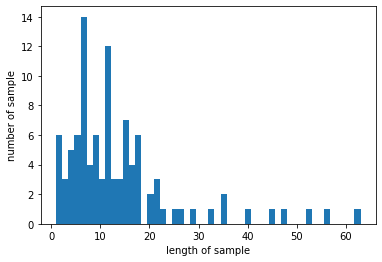

In [29]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [30]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [31]:
print('리뷰의 최대 길이: %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이: %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이: %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이: 63
리뷰의 최소 길이: 63
리뷰의 평균 길이: 63.000000


In [32]:
print(encoded[:3])

[[0, 568, 598, 153, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 13, 0, 0, 0, 0, 594, 0, 0, 13, 0, 0, 305, 0, 0, 0, 0, 0, 0, 0, 0, 594, 0, 0, 34, 0, 0, 13, 0, 0, 39, 0, 40, 622, 516, 39, 0, 44, 13, 45, 153, 0, 558, 40, 0, 49, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 56, 0, 0, 58, 0, 372, 433, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# 02. 토치텍스트 튜토리얼(Torchtext tutorial) - 영어

## 1. 훈련 데이터와 테스트 데이터로 분리하기

In [9]:
import urllib.request
import pandas as pd

In [10]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv",
    filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f94b5d689e8>)

In [11]:
df = pd.read_csv('IMDb_Reviews.csv', encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [12]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


In [13]:
train_df = df[:25000]
test_df = df[25000:]

In [14]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

## 2. 필드 정의하기(torchtext.data)

In [7]:
from torchtext import data # torchtext.data 임포트

# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

- sequential : 시퀀스 데이터 여부. (True가 기본값)
- use_vocab : 단어 집합을 만들 것인지 여부. (True가 기본값)
- tokenize : 어떤 토큰화 함수를 사용할 것인지 지정. (string.split이 기본값)
- lower : 영어 데이터를 전부 소문자화한다. (False가 기본값)
- batch_first : 미니 배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지 여부. (False가 기본값)
- is_target : 레이블 데이터 여부. (False가 기본값)
- fix_length : 최대 허용 길이. 이 길이에 맞춰서 패딩 작업(Padding)이 진행된다.

## 3. 데이터셋 만들기

In [15]:
from torchtext.data import TabularDataset

In [16]:
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('text', TEXT), ('label', LABEL)], skip_header = True)

In [17]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 25000
테스트 샘플의 개수 : 25000


In [18]:
print(vars(train_data[0]))


{'text': ['my', 'family', 'and', 'i', 'normally', 'do', 'not', 'watch', 'local', 'movies', 'for', 'the', 'simple', 'reason', 'that', 'they', 'are', 'poorly', 'made,', 'they', 'lack', 'the', 'depth,', 'and', 'just', 'not', 'worth', 'our', 'time.<br', '/><br', '/>the', 'trailer', 'of', '"nasaan', 'ka', 'man"', 'caught', 'my', 'attention,', 'my', 'daughter', 'in', "law's", 'and', "daughter's", 'so', 'we', 'took', 'time', 'out', 'to', 'watch', 'it', 'this', 'afternoon.', 'the', 'movie', 'exceeded', 'our', 'expectations.', 'the', 'cinematography', 'was', 'very', 'good,', 'the', 'story', 'beautiful', 'and', 'the', 'acting', 'awesome.', 'jericho', 'rosales', 'was', 'really', 'very', 'good,', "so's", 'claudine', 'barretto.', 'the', 'fact', 'that', 'i', 'despised', 'diether', 'ocampo', 'proves', 'he', 'was', 'effective', 'at', 'his', 'role.', 'i', 'have', 'never', 'been', 'this', 'touched,', 'moved', 'and', 'affected', 'by', 'a', 'local', 'movie', 'before.', 'imagine', 'a', 'cynic', 'like', 'me

In [19]:
print(train_data.fields.items())

dict_items([('text', <torchtext.data.field.Field object at 0x7f94f43fa4a8>), ('label', <torchtext.data.field.Field object at 0x7f94f43fa518>)])


## 4. 단어 집합(Vocabulary) 만들기

In [20]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)